In [3]:
from google.colab import drive

In [4]:
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
!pip install kneed

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [7]:
df = pd.read_excel("/content/drive/MyDrive/Course Work/Sem 4/Data Analysis and Visualization/Lab 8/dataset.xlsx")

In [8]:
df

,Sno,width,Length
0,1,3.7,19.4
1,2,2.9,15.3
2,3,3.9,22.6
3,4,2.2,18.3
4,5,3.0,19.3
5,6,2.3,11.5
6,7,2.4,11.7
7,8,3.4,22.7
8,9,2.3,13.4
9,10,1.8,10.7


In [9]:
cols = df.columns.tolist()

In [10]:
cols

['Sno', 'width', 'Length']

In [11]:
df.drop(columns=[cols[0]], inplace=True)

In [12]:
df

,width,Length
0,3.7,19.4
1,2.9,15.3
2,3.9,22.6
3,2.2,18.3
4,3.0,19.3
5,2.3,11.5
6,2.4,11.7
7,3.4,22.7
8,2.3,13.4
9,1.8,10.7


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   width   39 non-null     float64
 1   Length  39 non-null     float64
dtypes: float64(2)
memory usage: 756.0 bytes


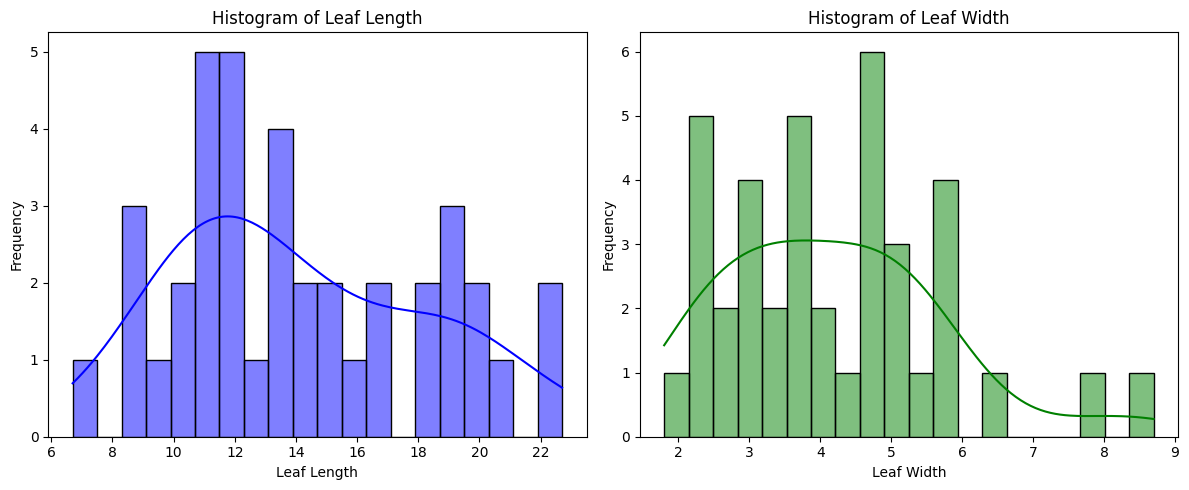

In [14]:
# Plot histograms for Leaf Length and Width
plt.figure(figsize=(12, 5))

# Histogram for Leaf Length
plt.subplot(1, 2, 1)
sns.histplot(df[cols[2]], bins=20, kde=True, color="blue")
plt.xlabel("Leaf Length")
plt.ylabel("Frequency")
plt.title("Histogram of Leaf Length")

# Histogram for Leaf Width
plt.subplot(1, 2, 2)
sns.histplot(df[cols[1]], bins=20, kde=True, color="green")
plt.xlabel("Leaf Width")
plt.ylabel("Frequency")
plt.title("Histogram of Leaf Width")

plt.tight_layout()
plt.show()

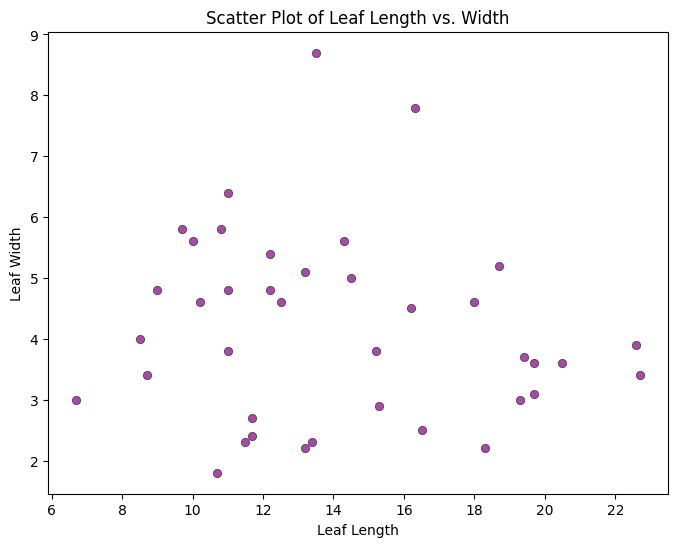

In [15]:
# Scatter plot for Leaf Length vs. Width
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[cols[2]], y=df[cols[1]], color="purple", alpha=0.7, edgecolor="black")

# Labels and title
plt.xlabel("Leaf Length")
plt.ylabel("Leaf Width")
plt.title("Scatter Plot of Leaf Length vs. Width")

plt.show()

In [16]:
X = df[[cols[2], cols[1]]]

In [17]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

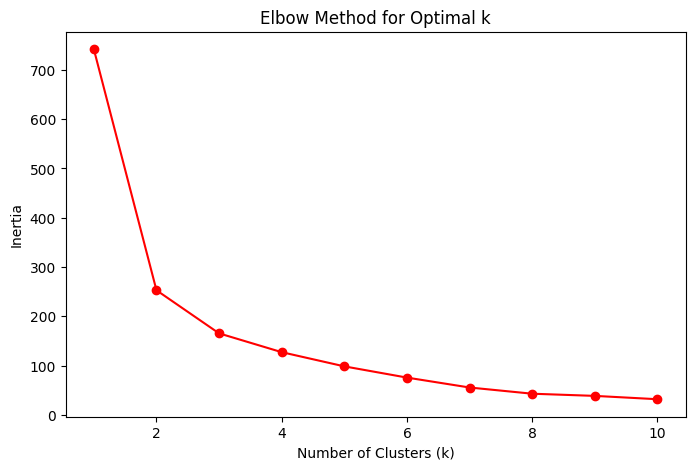

In [18]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker="o", linestyle="-", color="red")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [19]:
# Find the optimal k using the KneeLocator
knee = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
optimal_k = knee.elbow

In [20]:
# Perform K-Means Clustering with optimal k (choose based on elbow curve)
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

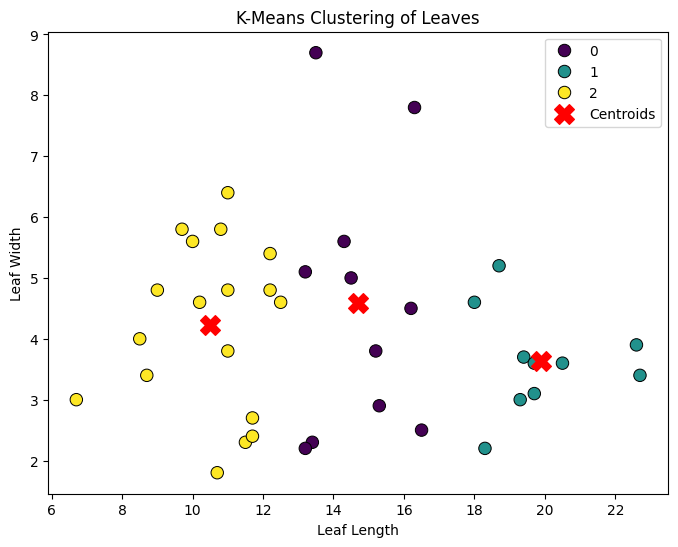

In [21]:
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[cols[2]], y=df[cols[1]], hue=df["Cluster"], palette="viridis", s=80, edgecolor="black")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroids")
plt.xlabel("Leaf Length")
plt.ylabel("Leaf Width")
plt.title("K-Means Clustering of Leaves")
plt.legend()
plt.show()

In [22]:
# Identify the largest cluster
largest_cluster = df["Cluster"].value_counts().idxmax()
df_largest = df[df["Cluster"] == largest_cluster]

In [23]:
# Perform Linear Regression on the largest cluster
X_cluster = df_largest[[cols[2]]].values
y_cluster = df_largest[cols[1]].values

In [24]:
regressor = LinearRegression()
regressor.fit(X_cluster, y_cluster)

LinearRegression()

In [25]:
# Generate predictions for the regression line
x_range = np.linspace(X_cluster.min(), X_cluster.max(), 100).reshape(-1, 1)
y_pred = regressor.predict(x_range)

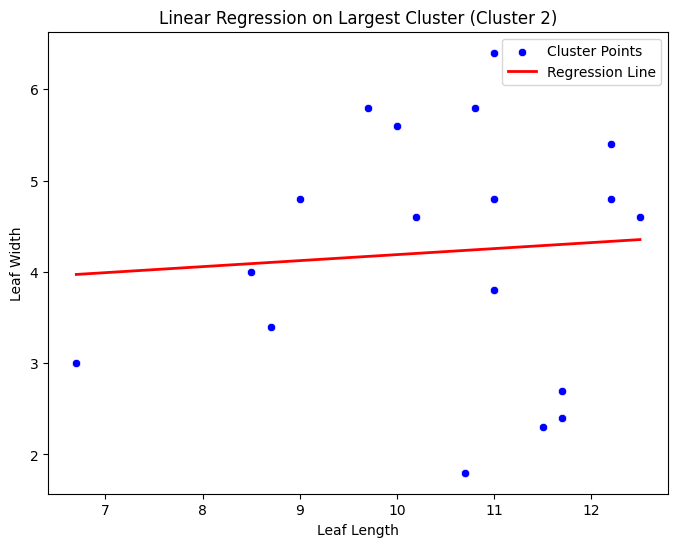

In [26]:
# Scatter plot of the largest cluster with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_largest[cols[2]], y=df_largest[cols[1]], color="blue", label="Cluster Points")
plt.plot(x_range, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Leaf Length")
plt.ylabel("Leaf Width")
plt.title(f"Linear Regression on Largest Cluster (Cluster {largest_cluster})")
plt.legend()
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, df["Cluster"], test_size=0.2, random_state=42)

In [28]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

In [29]:
# Decision Tree Accuracy & Report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Decision Tree Accuracy: 1.00


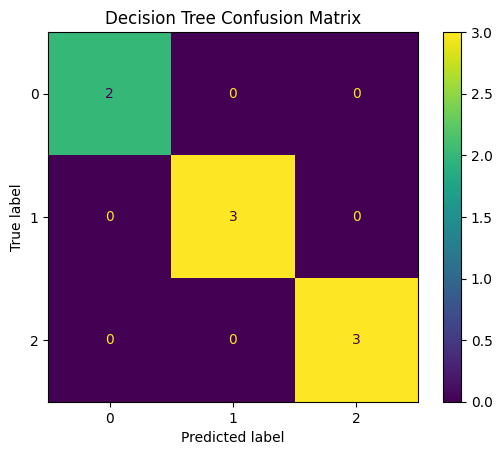

In [30]:
# Confusion Matrix for Decision Tree
ConfusionMatrixDisplay.from_estimator(dt_classifier, X_test, y_test)
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [31]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [32]:
# KNN Accuracy & Report
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")


KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

KNN Accuracy: 1.00


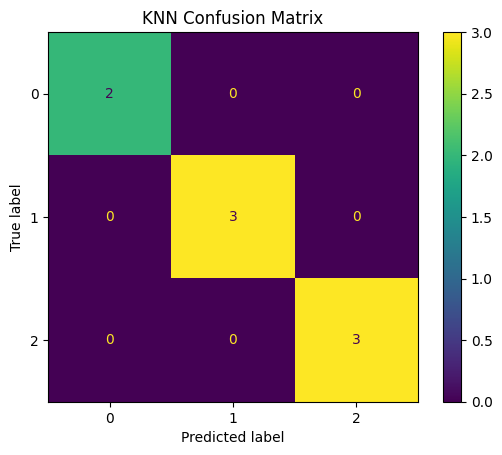

In [33]:
# Confusion Matrix for KNN
ConfusionMatrixDisplay.from_estimator(knn_classifier, X_test, y_test)
plt.title("KNN Confusion Matrix")
plt.show()